In [1]:
#-*-coding:utf-8-*-

%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader
import torchvision

import cv2

import copy

import time

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
%matplotlib inline

__ROOT_PATH = os.path.abspath('../../')
sys.path.append(__ROOT_PATH)

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
matplotlib.rcParams['figure.facecolor'] = 'w'

In [9]:
from csgan.loader.colored_mnist_loader import ColoredMnistDataset
from csgan.model.cs_glow_model_huk import CSGlowMnistModel

In [10]:
DATA_ROOT = os.path.join(__ROOT_PATH, "data/")
PRE_MODEL_ROOT = os.path.join(__ROOT_PATH, "pre_models/")
#DATA_ROOT = '/data'
RUN_ROOT = os.path.join(__ROOT_PATH, "runs/")

In [11]:
run_dir = os.path.join(RUN_ROOT, "mnist_cs_glow/")
os.makedirs(run_dir, exist_ok=True)

params = {'seed': 2222, 'num_epoch': 200, 'batch_size': 16, 'test_batch_size': 512,
          'learning_rate': 0.0005, 'beta1': 0.9, 'beta2': 0.999,
          'scheduler_gamma': 1., 'weight_decay': 0., #0.00001,
          'n_bits': 5,
          'lambda_glow': 1.,
          'lambda_weight_cycle': 0.5, 'lambda_siamese': 0.5,
          'lambda_content': 0.1, 'lambda_style': 0.1,
          'gamma_content': 0.5, 'gamma_style': 0.5,
          'scheduler_interval': 1000, 'checkpoint_interval': 100,
          'validation_interval': 10, 'logging_interval': 10, 'sampling_interval': 100,
          'stopping_loss': 'loss',
          'run_dir': run_dir}

In [5]:
train_dataset = ColoredMnistDataset(root=DATA_ROOT, dirname='colored_mnist', image_size=32, train=True)
test_dataset = ColoredMnistDataset(root=DATA_ROOT, dirname='colored_mnist', image_size=32, train=False)
#train_dataset = ColoredMnistDataset(root=DATA_ROOT, dirname='colored_mnist_bg', image_size=32, train=True)
#test_dataset = ColoredMnistDataset(root=DATA_ROOT, dirname='colored_mnist_bg', image_size=32, train=False)
print(len(train_dataset), len(test_dataset))

60000 10000


In [6]:
train_loader = DataLoader(train_dataset, params['batch_size'], shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, params['test_batch_size'], shuffle=False, drop_last=False)
print(len(train_loader), len(test_loader))

3750 20


In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cs_model = CSGlowMnistModel(device, os.path.join(PRE_MODEL_ROOT, 'colored_mnist_model_pre.pt'))
#cs_model.load(os.path.join(run_dir, 'checkpoint/model_5000.pth.tar'))
#cs_model.load(os.path.join(run_dir, 'best_model.pth.tar'))
#cs_model.train_model(train_loader, params=params)

RuntimeError: Error(s) in loading state_dict for Glow:
	Missing key(s) in state_dict: "blocks.4.flows.0.actnorm.loc", "blocks.4.flows.0.actnorm.scale", "blocks.4.flows.0.actnorm.initialized", "blocks.4.flows.0.invconv.w_l", "blocks.4.flows.0.invconv.w_s", "blocks.4.flows.0.invconv.w_u", "blocks.4.flows.0.invconv.w_p", "blocks.4.flows.0.invconv.u_mask", "blocks.4.flows.0.invconv.l_mask", "blocks.4.flows.0.invconv.s_sign", "blocks.4.flows.0.invconv.l_eye", "blocks.4.flows.0.coupling.net.0.weight", "blocks.4.flows.0.coupling.net.0.bias", "blocks.4.flows.0.coupling.net.2.weight", "blocks.4.flows.0.coupling.net.2.bias", "blocks.4.flows.0.coupling.net.4.scale", "blocks.4.flows.0.coupling.net.4.conv.weight", "blocks.4.flows.0.coupling.net.4.conv.bias", "blocks.4.flows.1.actnorm.loc", "blocks.4.flows.1.actnorm.scale", "blocks.4.flows.1.actnorm.initialized", "blocks.4.flows.1.invconv.w_l", "blocks.4.flows.1.invconv.w_s", "blocks.4.flows.1.invconv.w_u", "blocks.4.flows.1.invconv.w_p", "blocks.4.flows.1.invconv.u_mask", "blocks.4.flows.1.invconv.l_mask", "blocks.4.flows.1.invconv.s_sign", "blocks.4.flows.1.invconv.l_eye", "blocks.4.flows.1.coupling.net.0.weight", "blocks.4.flows.1.coupling.net.0.bias", "blocks.4.flows.1.coupling.net.2.weight", "blocks.4.flows.1.coupling.net.2.bias", "blocks.4.flows.1.coupling.net.4.scale", "blocks.4.flows.1.coupling.net.4.conv.weight", "blocks.4.flows.1.coupling.net.4.conv.bias", "blocks.4.flows.2.actnorm.loc", "blocks.4.flows.2.actnorm.scale", "blocks.4.flows.2.actnorm.initialized", "blocks.4.flows.2.invconv.w_l", "blocks.4.flows.2.invconv.w_s", "blocks.4.flows.2.invconv.w_u", "blocks.4.flows.2.invconv.w_p", "blocks.4.flows.2.invconv.u_mask", "blocks.4.flows.2.invconv.l_mask", "blocks.4.flows.2.invconv.s_sign", "blocks.4.flows.2.invconv.l_eye", "blocks.4.flows.2.coupling.net.0.weight", "blocks.4.flows.2.coupling.net.0.bias", "blocks.4.flows.2.coupling.net.2.weight", "blocks.4.flows.2.coupling.net.2.bias", "blocks.4.flows.2.coupling.net.4.scale", "blocks.4.flows.2.coupling.net.4.conv.weight", "blocks.4.flows.2.coupling.net.4.conv.bias", "blocks.4.flows.3.actnorm.loc", "blocks.4.flows.3.actnorm.scale", "blocks.4.flows.3.actnorm.initialized", "blocks.4.flows.3.invconv.w_l", "blocks.4.flows.3.invconv.w_s", "blocks.4.flows.3.invconv.w_u", "blocks.4.flows.3.invconv.w_p", "blocks.4.flows.3.invconv.u_mask", "blocks.4.flows.3.invconv.l_mask", "blocks.4.flows.3.invconv.s_sign", "blocks.4.flows.3.invconv.l_eye", "blocks.4.flows.3.coupling.net.0.weight", "blocks.4.flows.3.coupling.net.0.bias", "blocks.4.flows.3.coupling.net.2.weight", "blocks.4.flows.3.coupling.net.2.bias", "blocks.4.flows.3.coupling.net.4.scale", "blocks.4.flows.3.coupling.net.4.conv.weight", "blocks.4.flows.3.coupling.net.4.conv.bias", "blocks.4.flows.4.actnorm.loc", "blocks.4.flows.4.actnorm.scale", "blocks.4.flows.4.actnorm.initialized", "blocks.4.flows.4.invconv.w_l", "blocks.4.flows.4.invconv.w_s", "blocks.4.flows.4.invconv.w_u", "blocks.4.flows.4.invconv.w_p", "blocks.4.flows.4.invconv.u_mask", "blocks.4.flows.4.invconv.l_mask", "blocks.4.flows.4.invconv.s_sign", "blocks.4.flows.4.invconv.l_eye", "blocks.4.flows.4.coupling.net.0.weight", "blocks.4.flows.4.coupling.net.0.bias", "blocks.4.flows.4.coupling.net.2.weight", "blocks.4.flows.4.coupling.net.2.bias", "blocks.4.flows.4.coupling.net.4.scale", "blocks.4.flows.4.coupling.net.4.conv.weight", "blocks.4.flows.4.coupling.net.4.conv.bias", "blocks.4.flows.5.actnorm.loc", "blocks.4.flows.5.actnorm.scale", "blocks.4.flows.5.actnorm.initialized", "blocks.4.flows.5.invconv.w_l", "blocks.4.flows.5.invconv.w_s", "blocks.4.flows.5.invconv.w_u", "blocks.4.flows.5.invconv.w_p", "blocks.4.flows.5.invconv.u_mask", "blocks.4.flows.5.invconv.l_mask", "blocks.4.flows.5.invconv.s_sign", "blocks.4.flows.5.invconv.l_eye", "blocks.4.flows.5.coupling.net.0.weight", "blocks.4.flows.5.coupling.net.0.bias", "blocks.4.flows.5.coupling.net.2.weight", "blocks.4.flows.5.coupling.net.2.bias", "blocks.4.flows.5.coupling.net.4.scale", "blocks.4.flows.5.coupling.net.4.conv.weight", "blocks.4.flows.5.coupling.net.4.conv.bias", "blocks.4.flows.6.actnorm.loc", "blocks.4.flows.6.actnorm.scale", "blocks.4.flows.6.actnorm.initialized", "blocks.4.flows.6.invconv.w_l", "blocks.4.flows.6.invconv.w_s", "blocks.4.flows.6.invconv.w_u", "blocks.4.flows.6.invconv.w_p", "blocks.4.flows.6.invconv.u_mask", "blocks.4.flows.6.invconv.l_mask", "blocks.4.flows.6.invconv.s_sign", "blocks.4.flows.6.invconv.l_eye", "blocks.4.flows.6.coupling.net.0.weight", "blocks.4.flows.6.coupling.net.0.bias", "blocks.4.flows.6.coupling.net.2.weight", "blocks.4.flows.6.coupling.net.2.bias", "blocks.4.flows.6.coupling.net.4.scale", "blocks.4.flows.6.coupling.net.4.conv.weight", "blocks.4.flows.6.coupling.net.4.conv.bias", "blocks.4.flows.7.actnorm.loc", "blocks.4.flows.7.actnorm.scale", "blocks.4.flows.7.actnorm.initialized", "blocks.4.flows.7.invconv.w_l", "blocks.4.flows.7.invconv.w_s", "blocks.4.flows.7.invconv.w_u", "blocks.4.flows.7.invconv.w_p", "blocks.4.flows.7.invconv.u_mask", "blocks.4.flows.7.invconv.l_mask", "blocks.4.flows.7.invconv.s_sign", "blocks.4.flows.7.invconv.l_eye", "blocks.4.flows.7.coupling.net.0.weight", "blocks.4.flows.7.coupling.net.0.bias", "blocks.4.flows.7.coupling.net.2.weight", "blocks.4.flows.7.coupling.net.2.bias", "blocks.4.flows.7.coupling.net.4.scale", "blocks.4.flows.7.coupling.net.4.conv.weight", "blocks.4.flows.7.coupling.net.4.conv.bias", "blocks.4.flows.8.actnorm.loc", "blocks.4.flows.8.actnorm.scale", "blocks.4.flows.8.actnorm.initialized", "blocks.4.flows.8.invconv.w_l", "blocks.4.flows.8.invconv.w_s", "blocks.4.flows.8.invconv.w_u", "blocks.4.flows.8.invconv.w_p", "blocks.4.flows.8.invconv.u_mask", "blocks.4.flows.8.invconv.l_mask", "blocks.4.flows.8.invconv.s_sign", "blocks.4.flows.8.invconv.l_eye", "blocks.4.flows.8.coupling.net.0.weight", "blocks.4.flows.8.coupling.net.0.bias", "blocks.4.flows.8.coupling.net.2.weight", "blocks.4.flows.8.coupling.net.2.bias", "blocks.4.flows.8.coupling.net.4.scale", "blocks.4.flows.8.coupling.net.4.conv.weight", "blocks.4.flows.8.coupling.net.4.conv.bias", "blocks.4.flows.9.actnorm.loc", "blocks.4.flows.9.actnorm.scale", "blocks.4.flows.9.actnorm.initialized", "blocks.4.flows.9.invconv.w_l", "blocks.4.flows.9.invconv.w_s", "blocks.4.flows.9.invconv.w_u", "blocks.4.flows.9.invconv.w_p", "blocks.4.flows.9.invconv.u_mask", "blocks.4.flows.9.invconv.l_mask", "blocks.4.flows.9.invconv.s_sign", "blocks.4.flows.9.invconv.l_eye", "blocks.4.flows.9.coupling.net.0.weight", "blocks.4.flows.9.coupling.net.0.bias", "blocks.4.flows.9.coupling.net.2.weight", "blocks.4.flows.9.coupling.net.2.bias", "blocks.4.flows.9.coupling.net.4.scale", "blocks.4.flows.9.coupling.net.4.conv.weight", "blocks.4.flows.9.coupling.net.4.conv.bias", "blocks.4.flows.10.actnorm.loc", "blocks.4.flows.10.actnorm.scale", "blocks.4.flows.10.actnorm.initialized", "blocks.4.flows.10.invconv.w_l", "blocks.4.flows.10.invconv.w_s", "blocks.4.flows.10.invconv.w_u", "blocks.4.flows.10.invconv.w_p", "blocks.4.flows.10.invconv.u_mask", "blocks.4.flows.10.invconv.l_mask", "blocks.4.flows.10.invconv.s_sign", "blocks.4.flows.10.invconv.l_eye", "blocks.4.flows.10.coupling.net.0.weight", "blocks.4.flows.10.coupling.net.0.bias", "blocks.4.flows.10.coupling.net.2.weight", "blocks.4.flows.10.coupling.net.2.bias", "blocks.4.flows.10.coupling.net.4.scale", "blocks.4.flows.10.coupling.net.4.conv.weight", "blocks.4.flows.10.coupling.net.4.conv.bias", "blocks.4.flows.11.actnorm.loc", "blocks.4.flows.11.actnorm.scale", "blocks.4.flows.11.actnorm.initialized", "blocks.4.flows.11.invconv.w_l", "blocks.4.flows.11.invconv.w_s", "blocks.4.flows.11.invconv.w_u", "blocks.4.flows.11.invconv.w_p", "blocks.4.flows.11.invconv.u_mask", "blocks.4.flows.11.invconv.l_mask", "blocks.4.flows.11.invconv.s_sign", "blocks.4.flows.11.invconv.l_eye", "blocks.4.flows.11.coupling.net.0.weight", "blocks.4.flows.11.coupling.net.0.bias", "blocks.4.flows.11.coupling.net.2.weight", "blocks.4.flows.11.coupling.net.2.bias", "blocks.4.flows.11.coupling.net.4.scale", "blocks.4.flows.11.coupling.net.4.conv.weight", "blocks.4.flows.11.coupling.net.4.conv.bias", "blocks.4.flows.12.actnorm.loc", "blocks.4.flows.12.actnorm.scale", "blocks.4.flows.12.actnorm.initialized", "blocks.4.flows.12.invconv.w_l", "blocks.4.flows.12.invconv.w_s", "blocks.4.flows.12.invconv.w_u", "blocks.4.flows.12.invconv.w_p", "blocks.4.flows.12.invconv.u_mask", "blocks.4.flows.12.invconv.l_mask", "blocks.4.flows.12.invconv.s_sign", "blocks.4.flows.12.invconv.l_eye", "blocks.4.flows.12.coupling.net.0.weight", "blocks.4.flows.12.coupling.net.0.bias", "blocks.4.flows.12.coupling.net.2.weight", "blocks.4.flows.12.coupling.net.2.bias", "blocks.4.flows.12.coupling.net.4.scale", "blocks.4.flows.12.coupling.net.4.conv.weight", "blocks.4.flows.12.coupling.net.4.conv.bias", "blocks.4.flows.13.actnorm.loc", "blocks.4.flows.13.actnorm.scale", "blocks.4.flows.13.actnorm.initialized", "blocks.4.flows.13.invconv.w_l", "blocks.4.flows.13.invconv.w_s", "blocks.4.flows.13.invconv.w_u", "blocks.4.flows.13.invconv.w_p", "blocks.4.flows.13.invconv.u_mask", "blocks.4.flows.13.invconv.l_mask", "blocks.4.flows.13.invconv.s_sign", "blocks.4.flows.13.invconv.l_eye", "blocks.4.flows.13.coupling.net.0.weight", "blocks.4.flows.13.coupling.net.0.bias", "blocks.4.flows.13.coupling.net.2.weight", "blocks.4.flows.13.coupling.net.2.bias", "blocks.4.flows.13.coupling.net.4.scale", "blocks.4.flows.13.coupling.net.4.conv.weight", "blocks.4.flows.13.coupling.net.4.conv.bias", "blocks.4.flows.14.actnorm.loc", "blocks.4.flows.14.actnorm.scale", "blocks.4.flows.14.actnorm.initialized", "blocks.4.flows.14.invconv.w_l", "blocks.4.flows.14.invconv.w_s", "blocks.4.flows.14.invconv.w_u", "blocks.4.flows.14.invconv.w_p", "blocks.4.flows.14.invconv.u_mask", "blocks.4.flows.14.invconv.l_mask", "blocks.4.flows.14.invconv.s_sign", "blocks.4.flows.14.invconv.l_eye", "blocks.4.flows.14.coupling.net.0.weight", "blocks.4.flows.14.coupling.net.0.bias", "blocks.4.flows.14.coupling.net.2.weight", "blocks.4.flows.14.coupling.net.2.bias", "blocks.4.flows.14.coupling.net.4.scale", "blocks.4.flows.14.coupling.net.4.conv.weight", "blocks.4.flows.14.coupling.net.4.conv.bias", "blocks.4.flows.15.actnorm.loc", "blocks.4.flows.15.actnorm.scale", "blocks.4.flows.15.actnorm.initialized", "blocks.4.flows.15.invconv.w_l", "blocks.4.flows.15.invconv.w_s", "blocks.4.flows.15.invconv.w_u", "blocks.4.flows.15.invconv.w_p", "blocks.4.flows.15.invconv.u_mask", "blocks.4.flows.15.invconv.l_mask", "blocks.4.flows.15.invconv.s_sign", "blocks.4.flows.15.invconv.l_eye", "blocks.4.flows.15.coupling.net.0.weight", "blocks.4.flows.15.coupling.net.0.bias", "blocks.4.flows.15.coupling.net.2.weight", "blocks.4.flows.15.coupling.net.2.bias", "blocks.4.flows.15.coupling.net.4.scale", "blocks.4.flows.15.coupling.net.4.conv.weight", "blocks.4.flows.15.coupling.net.4.conv.bias", "blocks.4.flows.16.actnorm.loc", "blocks.4.flows.16.actnorm.scale", "blocks.4.flows.16.actnorm.initialized", "blocks.4.flows.16.invconv.w_l", "blocks.4.flows.16.invconv.w_s", "blocks.4.flows.16.invconv.w_u", "blocks.4.flows.16.invconv.w_p", "blocks.4.flows.16.invconv.u_mask", "blocks.4.flows.16.invconv.l_mask", "blocks.4.flows.16.invconv.s_sign", "blocks.4.flows.16.invconv.l_eye", "blocks.4.flows.16.coupling.net.0.weight", "blocks.4.flows.16.coupling.net.0.bias", "blocks.4.flows.16.coupling.net.2.weight", "blocks.4.flows.16.coupling.net.2.bias", "blocks.4.flows.16.coupling.net.4.scale", "blocks.4.flows.16.coupling.net.4.conv.weight", "blocks.4.flows.16.coupling.net.4.conv.bias", "blocks.4.flows.17.actnorm.loc", "blocks.4.flows.17.actnorm.scale", "blocks.4.flows.17.actnorm.initialized", "blocks.4.flows.17.invconv.w_l", "blocks.4.flows.17.invconv.w_s", "blocks.4.flows.17.invconv.w_u", "blocks.4.flows.17.invconv.w_p", "blocks.4.flows.17.invconv.u_mask", "blocks.4.flows.17.invconv.l_mask", "blocks.4.flows.17.invconv.s_sign", "blocks.4.flows.17.invconv.l_eye", "blocks.4.flows.17.coupling.net.0.weight", "blocks.4.flows.17.coupling.net.0.bias", "blocks.4.flows.17.coupling.net.2.weight", "blocks.4.flows.17.coupling.net.2.bias", "blocks.4.flows.17.coupling.net.4.scale", "blocks.4.flows.17.coupling.net.4.conv.weight", "blocks.4.flows.17.coupling.net.4.conv.bias", "blocks.4.flows.18.actnorm.loc", "blocks.4.flows.18.actnorm.scale", "blocks.4.flows.18.actnorm.initialized", "blocks.4.flows.18.invconv.w_l", "blocks.4.flows.18.invconv.w_s", "blocks.4.flows.18.invconv.w_u", "blocks.4.flows.18.invconv.w_p", "blocks.4.flows.18.invconv.u_mask", "blocks.4.flows.18.invconv.l_mask", "blocks.4.flows.18.invconv.s_sign", "blocks.4.flows.18.invconv.l_eye", "blocks.4.flows.18.coupling.net.0.weight", "blocks.4.flows.18.coupling.net.0.bias", "blocks.4.flows.18.coupling.net.2.weight", "blocks.4.flows.18.coupling.net.2.bias", "blocks.4.flows.18.coupling.net.4.scale", "blocks.4.flows.18.coupling.net.4.conv.weight", "blocks.4.flows.18.coupling.net.4.conv.bias", "blocks.4.flows.19.actnorm.loc", "blocks.4.flows.19.actnorm.scale", "blocks.4.flows.19.actnorm.initialized", "blocks.4.flows.19.invconv.w_l", "blocks.4.flows.19.invconv.w_s", "blocks.4.flows.19.invconv.w_u", "blocks.4.flows.19.invconv.w_p", "blocks.4.flows.19.invconv.u_mask", "blocks.4.flows.19.invconv.l_mask", "blocks.4.flows.19.invconv.s_sign", "blocks.4.flows.19.invconv.l_eye", "blocks.4.flows.19.coupling.net.0.weight", "blocks.4.flows.19.coupling.net.0.bias", "blocks.4.flows.19.coupling.net.2.weight", "blocks.4.flows.19.coupling.net.2.bias", "blocks.4.flows.19.coupling.net.4.scale", "blocks.4.flows.19.coupling.net.4.conv.weight", "blocks.4.flows.19.coupling.net.4.conv.bias", "blocks.4.flows.20.actnorm.loc", "blocks.4.flows.20.actnorm.scale", "blocks.4.flows.20.actnorm.initialized", "blocks.4.flows.20.invconv.w_l", "blocks.4.flows.20.invconv.w_s", "blocks.4.flows.20.invconv.w_u", "blocks.4.flows.20.invconv.w_p", "blocks.4.flows.20.invconv.u_mask", "blocks.4.flows.20.invconv.l_mask", "blocks.4.flows.20.invconv.s_sign", "blocks.4.flows.20.invconv.l_eye", "blocks.4.flows.20.coupling.net.0.weight", "blocks.4.flows.20.coupling.net.0.bias", "blocks.4.flows.20.coupling.net.2.weight", "blocks.4.flows.20.coupling.net.2.bias", "blocks.4.flows.20.coupling.net.4.scale", "blocks.4.flows.20.coupling.net.4.conv.weight", "blocks.4.flows.20.coupling.net.4.conv.bias", "blocks.4.flows.21.actnorm.loc", "blocks.4.flows.21.actnorm.scale", "blocks.4.flows.21.actnorm.initialized", "blocks.4.flows.21.invconv.w_l", "blocks.4.flows.21.invconv.w_s", "blocks.4.flows.21.invconv.w_u", "blocks.4.flows.21.invconv.w_p", "blocks.4.flows.21.invconv.u_mask", "blocks.4.flows.21.invconv.l_mask", "blocks.4.flows.21.invconv.s_sign", "blocks.4.flows.21.invconv.l_eye", "blocks.4.flows.21.coupling.net.0.weight", "blocks.4.flows.21.coupling.net.0.bias", "blocks.4.flows.21.coupling.net.2.weight", "blocks.4.flows.21.coupling.net.2.bias", "blocks.4.flows.21.coupling.net.4.scale", "blocks.4.flows.21.coupling.net.4.conv.weight", "blocks.4.flows.21.coupling.net.4.conv.bias", "blocks.4.flows.22.actnorm.loc", "blocks.4.flows.22.actnorm.scale", "blocks.4.flows.22.actnorm.initialized", "blocks.4.flows.22.invconv.w_l", "blocks.4.flows.22.invconv.w_s", "blocks.4.flows.22.invconv.w_u", "blocks.4.flows.22.invconv.w_p", "blocks.4.flows.22.invconv.u_mask", "blocks.4.flows.22.invconv.l_mask", "blocks.4.flows.22.invconv.s_sign", "blocks.4.flows.22.invconv.l_eye", "blocks.4.flows.22.coupling.net.0.weight", "blocks.4.flows.22.coupling.net.0.bias", "blocks.4.flows.22.coupling.net.2.weight", "blocks.4.flows.22.coupling.net.2.bias", "blocks.4.flows.22.coupling.net.4.scale", "blocks.4.flows.22.coupling.net.4.conv.weight", "blocks.4.flows.22.coupling.net.4.conv.bias", "blocks.4.flows.23.actnorm.loc", "blocks.4.flows.23.actnorm.scale", "blocks.4.flows.23.actnorm.initialized", "blocks.4.flows.23.invconv.w_l", "blocks.4.flows.23.invconv.w_s", "blocks.4.flows.23.invconv.w_u", "blocks.4.flows.23.invconv.w_p", "blocks.4.flows.23.invconv.u_mask", "blocks.4.flows.23.invconv.l_mask", "blocks.4.flows.23.invconv.s_sign", "blocks.4.flows.23.invconv.l_eye", "blocks.4.flows.23.coupling.net.0.weight", "blocks.4.flows.23.coupling.net.0.bias", "blocks.4.flows.23.coupling.net.2.weight", "blocks.4.flows.23.coupling.net.2.bias", "blocks.4.flows.23.coupling.net.4.scale", "blocks.4.flows.23.coupling.net.4.conv.weight", "blocks.4.flows.23.coupling.net.4.conv.bias", "blocks.4.flows.24.actnorm.loc", "blocks.4.flows.24.actnorm.scale", "blocks.4.flows.24.actnorm.initialized", "blocks.4.flows.24.invconv.w_l", "blocks.4.flows.24.invconv.w_s", "blocks.4.flows.24.invconv.w_u", "blocks.4.flows.24.invconv.w_p", "blocks.4.flows.24.invconv.u_mask", "blocks.4.flows.24.invconv.l_mask", "blocks.4.flows.24.invconv.s_sign", "blocks.4.flows.24.invconv.l_eye", "blocks.4.flows.24.coupling.net.0.weight", "blocks.4.flows.24.coupling.net.0.bias", "blocks.4.flows.24.coupling.net.2.weight", "blocks.4.flows.24.coupling.net.2.bias", "blocks.4.flows.24.coupling.net.4.scale", "blocks.4.flows.24.coupling.net.4.conv.weight", "blocks.4.flows.24.coupling.net.4.conv.bias", "blocks.4.flows.25.actnorm.loc", "blocks.4.flows.25.actnorm.scale", "blocks.4.flows.25.actnorm.initialized", "blocks.4.flows.25.invconv.w_l", "blocks.4.flows.25.invconv.w_s", "blocks.4.flows.25.invconv.w_u", "blocks.4.flows.25.invconv.w_p", "blocks.4.flows.25.invconv.u_mask", "blocks.4.flows.25.invconv.l_mask", "blocks.4.flows.25.invconv.s_sign", "blocks.4.flows.25.invconv.l_eye", "blocks.4.flows.25.coupling.net.0.weight", "blocks.4.flows.25.coupling.net.0.bias", "blocks.4.flows.25.coupling.net.2.weight", "blocks.4.flows.25.coupling.net.2.bias", "blocks.4.flows.25.coupling.net.4.scale", "blocks.4.flows.25.coupling.net.4.conv.weight", "blocks.4.flows.25.coupling.net.4.conv.bias", "blocks.4.flows.26.actnorm.loc", "blocks.4.flows.26.actnorm.scale", "blocks.4.flows.26.actnorm.initialized", "blocks.4.flows.26.invconv.w_l", "blocks.4.flows.26.invconv.w_s", "blocks.4.flows.26.invconv.w_u", "blocks.4.flows.26.invconv.w_p", "blocks.4.flows.26.invconv.u_mask", "blocks.4.flows.26.invconv.l_mask", "blocks.4.flows.26.invconv.s_sign", "blocks.4.flows.26.invconv.l_eye", "blocks.4.flows.26.coupling.net.0.weight", "blocks.4.flows.26.coupling.net.0.bias", "blocks.4.flows.26.coupling.net.2.weight", "blocks.4.flows.26.coupling.net.2.bias", "blocks.4.flows.26.coupling.net.4.scale", "blocks.4.flows.26.coupling.net.4.conv.weight", "blocks.4.flows.26.coupling.net.4.conv.bias", "blocks.4.flows.27.actnorm.loc", "blocks.4.flows.27.actnorm.scale", "blocks.4.flows.27.actnorm.initialized", "blocks.4.flows.27.invconv.w_l", "blocks.4.flows.27.invconv.w_s", "blocks.4.flows.27.invconv.w_u", "blocks.4.flows.27.invconv.w_p", "blocks.4.flows.27.invconv.u_mask", "blocks.4.flows.27.invconv.l_mask", "blocks.4.flows.27.invconv.s_sign", "blocks.4.flows.27.invconv.l_eye", "blocks.4.flows.27.coupling.net.0.weight", "blocks.4.flows.27.coupling.net.0.bias", "blocks.4.flows.27.coupling.net.2.weight", "blocks.4.flows.27.coupling.net.2.bias", "blocks.4.flows.27.coupling.net.4.scale", "blocks.4.flows.27.coupling.net.4.conv.weight", "blocks.4.flows.27.coupling.net.4.conv.bias", "blocks.4.flows.28.actnorm.loc", "blocks.4.flows.28.actnorm.scale", "blocks.4.flows.28.actnorm.initialized", "blocks.4.flows.28.invconv.w_l", "blocks.4.flows.28.invconv.w_s", "blocks.4.flows.28.invconv.w_u", "blocks.4.flows.28.invconv.w_p", "blocks.4.flows.28.invconv.u_mask", "blocks.4.flows.28.invconv.l_mask", "blocks.4.flows.28.invconv.s_sign", "blocks.4.flows.28.invconv.l_eye", "blocks.4.flows.28.coupling.net.0.weight", "blocks.4.flows.28.coupling.net.0.bias", "blocks.4.flows.28.coupling.net.2.weight", "blocks.4.flows.28.coupling.net.2.bias", "blocks.4.flows.28.coupling.net.4.scale", "blocks.4.flows.28.coupling.net.4.conv.weight", "blocks.4.flows.28.coupling.net.4.conv.bias", "blocks.4.flows.29.actnorm.loc", "blocks.4.flows.29.actnorm.scale", "blocks.4.flows.29.actnorm.initialized", "blocks.4.flows.29.invconv.w_l", "blocks.4.flows.29.invconv.w_s", "blocks.4.flows.29.invconv.w_u", "blocks.4.flows.29.invconv.w_p", "blocks.4.flows.29.invconv.u_mask", "blocks.4.flows.29.invconv.l_mask", "blocks.4.flows.29.invconv.s_sign", "blocks.4.flows.29.invconv.l_eye", "blocks.4.flows.29.coupling.net.0.weight", "blocks.4.flows.29.coupling.net.0.bias", "blocks.4.flows.29.coupling.net.2.weight", "blocks.4.flows.29.coupling.net.2.bias", "blocks.4.flows.29.coupling.net.4.scale", "blocks.4.flows.29.coupling.net.4.conv.weight", "blocks.4.flows.29.coupling.net.4.conv.bias", "blocks.4.flows.30.actnorm.loc", "blocks.4.flows.30.actnorm.scale", "blocks.4.flows.30.actnorm.initialized", "blocks.4.flows.30.invconv.w_l", "blocks.4.flows.30.invconv.w_s", "blocks.4.flows.30.invconv.w_u", "blocks.4.flows.30.invconv.w_p", "blocks.4.flows.30.invconv.u_mask", "blocks.4.flows.30.invconv.l_mask", "blocks.4.flows.30.invconv.s_sign", "blocks.4.flows.30.invconv.l_eye", "blocks.4.flows.30.coupling.net.0.weight", "blocks.4.flows.30.coupling.net.0.bias", "blocks.4.flows.30.coupling.net.2.weight", "blocks.4.flows.30.coupling.net.2.bias", "blocks.4.flows.30.coupling.net.4.scale", "blocks.4.flows.30.coupling.net.4.conv.weight", "blocks.4.flows.30.coupling.net.4.conv.bias", "blocks.4.flows.31.actnorm.loc", "blocks.4.flows.31.actnorm.scale", "blocks.4.flows.31.actnorm.initialized", "blocks.4.flows.31.invconv.w_l", "blocks.4.flows.31.invconv.w_s", "blocks.4.flows.31.invconv.w_u", "blocks.4.flows.31.invconv.w_p", "blocks.4.flows.31.invconv.u_mask", "blocks.4.flows.31.invconv.l_mask", "blocks.4.flows.31.invconv.s_sign", "blocks.4.flows.31.invconv.l_eye", "blocks.4.flows.31.coupling.net.0.weight", "blocks.4.flows.31.coupling.net.0.bias", "blocks.4.flows.31.coupling.net.2.weight", "blocks.4.flows.31.coupling.net.2.bias", "blocks.4.flows.31.coupling.net.4.scale", "blocks.4.flows.31.coupling.net.4.conv.weight", "blocks.4.flows.31.coupling.net.4.conv.bias", "blocks.4.prior.scale", "blocks.4.prior.conv.weight", "blocks.4.prior.conv.bias". 
	size mismatch for blocks.3.prior.scale: copying a param with shape torch.Size([1, 192, 1, 1]) from checkpoint, the shape in current model is torch.Size([1, 96, 1, 1]).
	size mismatch for blocks.3.prior.conv.weight: copying a param with shape torch.Size([192, 97, 3, 3]) from checkpoint, the shape in current model is torch.Size([96, 49, 3, 3]).
	size mismatch for blocks.3.prior.conv.bias: copying a param with shape torch.Size([192]) from checkpoint, the shape in current model is torch.Size([96]).

In [14]:
all_input, all_output = cs_model.predict(test_loader)

In [18]:
np.savez(os.path.join(run_dir, 'all_input.npz'), **all_input)
np.savez(os.path.join(run_dir, 'all_output.npz'), **all_output)

In [25]:
test_fe.shape

(10000, 138)

In [30]:
all_input['c2'].numpy().shape

(10000, 3)

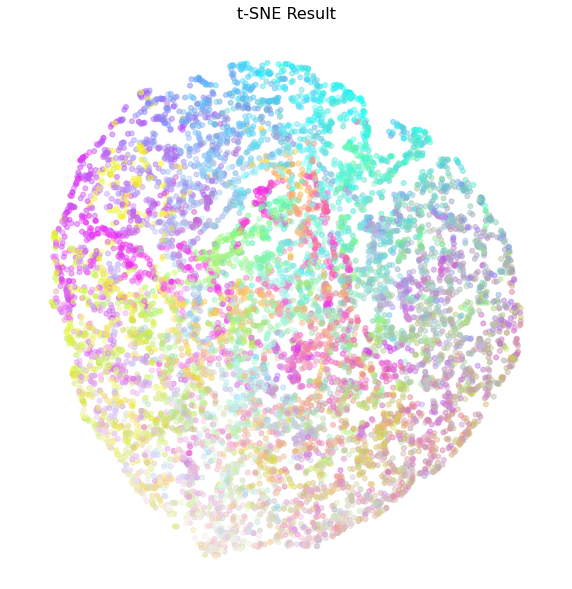

In [48]:
# TSNE requirements
from sklearn.manifold import TSNE
import seaborn as sns

#extract last features only
test_features = all_output['s2'].numpy()
tsne = TSNE(n_components=2, perplexity=10, n_iter=300)
tsne_ref = tsne.fit_transform(test_features)
df = pd.DataFrame(tsne_ref, index=tsne_ref[0:,1])
df['x'] = tsne_ref[:,0]
df['y'] = tsne_ref[:,1]
#df['Label'] = y[:]

#sns.scatterplot(x="x", y="y", hue="y", palette=sns.color_palette("hls", 10), data=df)
plt.figure(figsize = (10, 10))
plt.axis('equal')
plt.scatter(tsne_ref[:, 0], tsne_ref[:, 1], s=25, c=all_input['c2'].numpy(), alpha=0.5)
plt.title("t-SNE Result", fontsize=16, pad=20)
#plt.xlabel('x', fontsize=16, labelpad=10)
#plt.ylabel('y', fontsize=16, labelpad=10)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.axis('off')

plt.savefig(os.path.join(run_dir, f"tsne_result.png"), dpi=200, bbox_inches='tight')
plt.show()

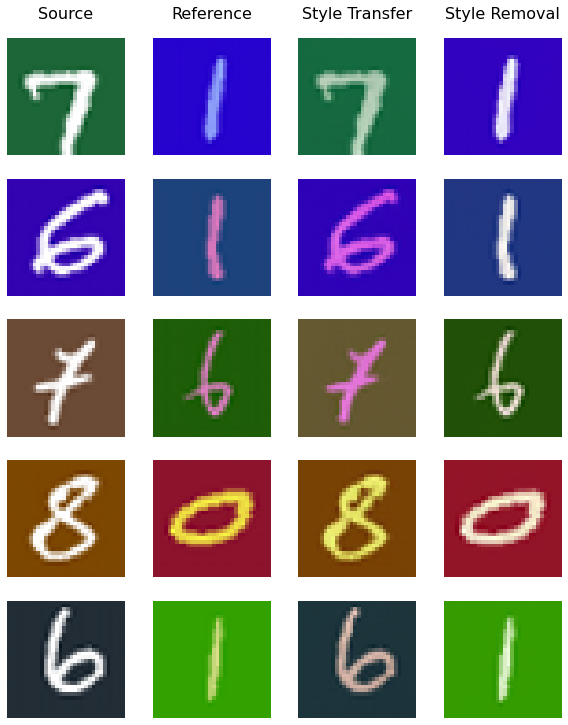

In [93]:
m = 4
n = 5
fig = plt.figure(figsize=(10., 10.*float(n)/float(m)))
indices = np.arange(len(all_input['x1']))
np.random.shuffle(indices)
for index in range(n):
    ax = fig.add_subplot(n, m, m*index+1)
    ax.axis('off')
    ax.imshow(all_input['x1'][indices[index], :3].detach().cpu().numpy().transpose(1, 2, 0))
    if index == 0:
        ax.set_title('Source', fontsize=16, pad=20)
    ax = fig.add_subplot(n, m, m*index+2)
    ax.axis('off')
    ax.imshow(all_input['x2'][indices[index], :3].detach().cpu().numpy().transpose(1, 2, 0))
    if index == 0:
        ax.set_title('Reference', fontsize=16, pad=20)
    ax = fig.add_subplot(n, m, m*index+3)
    ax.axis('off')
    ax.imshow(all_output['x12'][indices[index]].detach().cpu().numpy().transpose(1, 2, 0))
    if index == 0:
        ax.set_title('Style Transfer', fontsize=16, pad=20)
    ax = fig.add_subplot(n, m, m*index+4)
    ax.axis('off')
    if index == 0:
        ax.set_title('Style Removal', fontsize=16, pad=20)
    ax.imshow(all_output['x21'][indices[index]].detach().cpu().numpy().transpose(1, 2, 0))

plt.savefig(os.path.join(run_dir, f"sampling_result.png"), dpi=200, bbox_inches='tight')
plt.show()

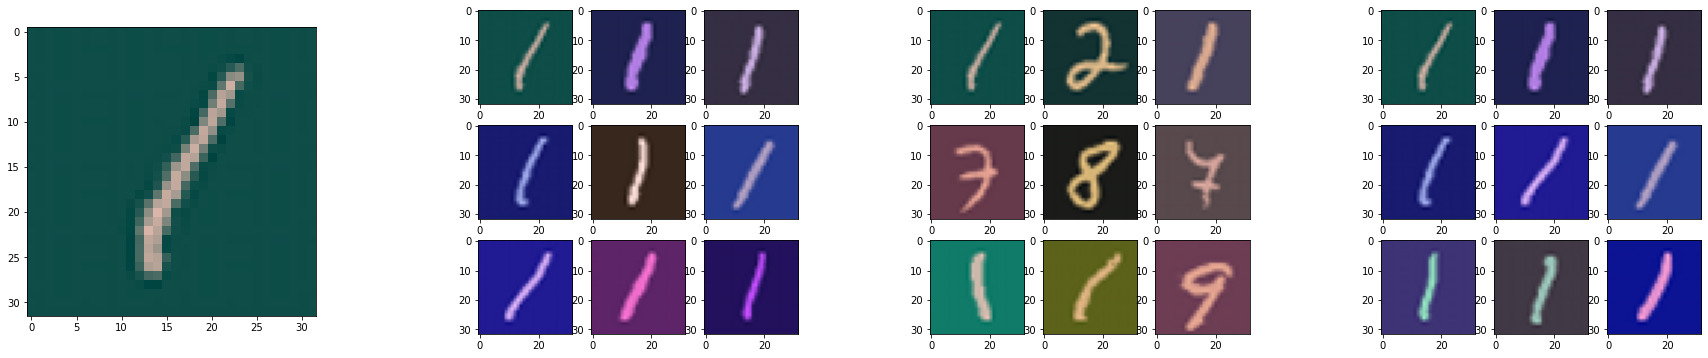

In [23]:
images = all_input['x2'].numpy().transpose(0, 2, 3, 1)
latents = all_output['z2'].numpy()
styles = all_output['s2'].numpy()
contents = all_output['c2'].numpy()

index = np.random.randint(len(images))

fig = plt.figure(figsize=(30, 6))

ax = fig.add_subplot(1, 5, 1)
ax.imshow(images[index])
content_indices = ((contents-contents[index:index+1])**2).mean(axis=1).argsort(axis=0)
style_indices = ((styles-styles[index:index+1])**2).mean(axis=1).argsort(axis=0)
latent_indices = ((latents-latents[index:index+1])**2).mean(axis=1).argsort(axis=0)
for i in range(9):
    ax = fig.add_subplot(3, 15, 15*(i//3)+(i%3)+5)
    ax.imshow(images[content_indices[i]])
for i in range(9):
    ax = fig.add_subplot(3, 15, 15*(i//3)+(i%3)+9)
    ax.imshow(images[style_indices[i]])
for i in range(9):
    ax = fig.add_subplot(3, 15, 15*(i//3)+(i%3)+13)
    ax.imshow(images[latent_indices[i]])

plt.savefig(os.path.join(__ROOT_PATH, "./results/", f"similar_test.png"), dpi=200, bbox_inches='tight')
plt.show()